In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

1. Resuelva la siguiente integral definida con el primer método de integración por Montecarlo usando 100, 1000, 10000, 100000, 1000000 y 10000000 puntos. Compárelo con su valor real=1.
$$
\int_1^e\frac{1}{x}dx
$$

---
```PYTHON
import pandas as pd

Ns=np.logspace(2,7,6).astype('int') # [10^2,...,10^7]
tabla=pd.DataFrame(index=Ns,columns=['aprox','error'])
```
---

2. Encuentre el volumen de una copa descrita como sigue:

In [3]:
def copa(th,r,z):
    C1 = (z>0)*(r>=0.9*z)*(r<=1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(r<0.5)*(z>=-1.6)
    C3 = (r<0.1)*(z<=0)*(z>-1.5)
    return C1 | C2 | C3

Use límites para $-1.6\leq z\leq 1$, $0\leq r \leq 2$ y $-\pi\leq\theta\leq\pi$. Con puntos desde $10^2$ hasta $10^7$, mostrando en una tabla la acotación del error relativo a priori.

In [4]:
def copaE(th,z):
    C1 = (z>0)*(1.1*z)*(z<=1)
    C2 = (z<=-1.5)*(0.5)*(z>=-1.6)
    C3 = 0.1*(z<=0)*(z>-1.5)
    return C1+C2+C3

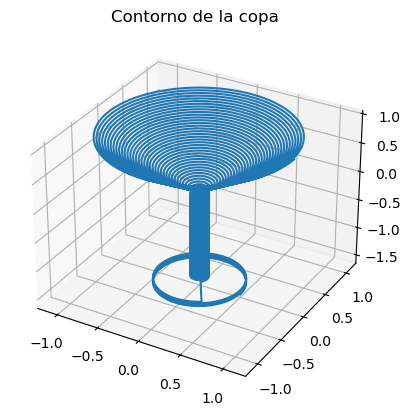

In [7]:
th=np.linspace(-np.pi*1000000,1000000*np.pi,10000)
z=np.linspace(-1.6,1,10000)

r1=copaE(th,z)

x1=r1*np.cos(th)
y1=r1*np.sin(th)

fig = plt.figure()
ax=plt.axes(projection='3d')
plt.title('Contorno de la copa')
ax.plot(x1,y1,z)

---
```PYTHON
def monetcarlo2(region,thLim,rLim,zLim,N):
    '''
    Integración Montecarlo para coordenadas cilíndricas :)
    '''
    thu=np.random.uniform(*thLim,N) # Variable aleatoria uniformemente distribuida
    ru=np.random.uniform(*rLim,N)
    zu=np.random.uniform(*zLim,N)
    B=copa(thu,ru,zu)  # Variable de Bernoulli
    z=zLim[1]-zLim[0]
    r=rLim[1]-rLim[0]
    AR=z*np.pi*r**2    # Volumen de la región conocida
    TH=np.mean(B)
    e_rel=np.sqrt(TH*(1-TH)/TH/N)
    return AR*TH,e_rel # Aproximación de la integral (volumen) y error relativo

tab.loc[N,'aprox'],tab.loc[N,'error']=montecarlo2(copa,(-np.pi,np.pi),(0,2),(-1.6,1),N)
```
---

3. Dada la función
$$
\frac{dy}{dx}=e^{-x^2+1}\cos(13x)+3
$$

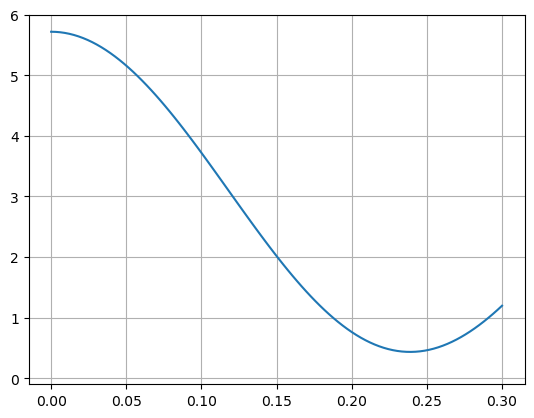

In [9]:
x=np.linspace(0,0.3,100)
dy=np.exp(-x**2+1)*np.cos(13*x)+3
plt.plot(x,dy)
plt.ylim([-0.1,6])
plt.grid()

3.1 Encuentre $y(0.1)$ con el primer método de integración por Montecarlo conociendo $y(0)=1$. Use $10^7$ puntos.

3.2 Encuentre de igual forma $y(0.2)$ de dos formas, una conociendo $y(0)$ y otra conociendo $y(0.1)$, finalmente compare las integrales en una tabla usando desde $10^2$ hasta $10^7$ puntos.